# 신경망 기초

## 4-1 OR 데이터에 퍼셉트론 적용

In [1]:
from sklearn.linear_model import Perceptron

# 훈련 집합 구축
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [-1, 1, 1, 1]

# fit 함수로 Perceptron 학습
perceptron = Perceptron()
perceptron.fit(X, y)

print('학습된 퍼셉트론의 매개변수:', perceptron.coef_, perceptron.intercept_)
print('훈련집합에 대한 예측:', perceptron.predict(X))
print('정황률 측정: {}%'.format(perceptron.score(X, y) * 100))

학습된 퍼셉트론의 매개변수: [[2. 2.]] [-1.]
훈련집합에 대한 예측: [-1  1  1  1]
정황률 측정: 100.0%


## 4-2 필기 숫자 데이터에 퍼셉트론 적용

In [2]:
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
import numpy as np

digit = datasets.load_digits()
x_train, x_test, y_train, y_test = train_test_split(digit.data, digit.target, train_size=0.6)

# verbose- 학습과정에서 발생하는 메세지 출력
perceptron = Perceptron(max_iter=100, eta0=0.001, verbose=1)
perceptron.fit(x_train, y_train)

result = perceptron.predict(x_test)
#print(result)

conf_mat = np.zeros((10, 10))
for i in range(len(result)):
    conf_mat[result[i]][y_test[i]] += 1
print(conf_mat)

num_correct = 0
for i in range(10):
    num_correct += conf_mat[i][i]
accuracy = num_correct / len(result)
print('테스트 집합에 대한 정확률은 {}%입니다.'.format(accuracy * 100))

-- Epoch 1
Norm: 0.27, NNZs: 53, Bias: -0.003000, T: 1078, Avg. loss: 0.020678
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.29, NNZs: 53, Bias: -0.003000, T: 2156, Avg. loss: 0.002637
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 53, Bias: -0.005000, T: 3234, Avg. loss: 0.005288
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.35, NNZs: 53, Bias: -0.005000, T: 4312, Avg. loss: 0.004568
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.39, NNZs: 53, Bias: -0.005000, T: 5390, Avg. loss: 0.004780
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.40, NNZs: 53, Bias: -0.006000, T: 6468, Avg. loss: 0.001766
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 0.41, NNZs: 53, Bias: -0.007000, T: 7546, Avg. loss: 0.001998
Total training time: 0.01 seconds.
Convergence after 7 epochs took 0.01 seconds
-- Epoch 1
Norm: 0.38, NNZs: 54, Bias: -0.006000, T: 1078, Avg. loss: 0.109201
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.50, NNZs: 56, Bias: -0.0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


## 4-3 sklearn 필기 숫자 데이터에 다층 퍼셉트론 적용

In [3]:
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np

digit = datasets.load_digits()
x_train, x_test, y_train, y_test = train_test_split(digit.data, digit.target, train_size=0.6)

mlp = MLPClassifier(hidden_layer_sizes=(100), learning_rate_init=0.001, batch_size=32, max_iter=300, solver='sgd', verbose=True)
mlp.fit(x_train, y_train)

result = mlp.predict(x_test)

conf_mat = np.zeros((10, 10))
for i in range(len(result)):
    conf_mat[result[i]][y_test[i]] += 1
print(conf_mat)

num_correct = 0
for i in range(10):
    num_correct += conf_mat[i][i]
accuracy = num_correct / len(result)
print('테스트 집합에 대한 정확률은 {}%입니다.'.format(accuracy * 100))

Iteration 1, loss = 1.98921901
Iteration 2, loss = 0.26061820
Iteration 3, loss = 0.15814594
Iteration 4, loss = 0.11745525
Iteration 5, loss = 0.09351198
Iteration 6, loss = 0.07954411
Iteration 7, loss = 0.06554411
Iteration 8, loss = 0.06127121
Iteration 9, loss = 0.05312082
Iteration 10, loss = 0.04593159
Iteration 11, loss = 0.04382565
Iteration 12, loss = 0.03963568
Iteration 13, loss = 0.03698633
Iteration 14, loss = 0.03327996
Iteration 15, loss = 0.03296182
Iteration 16, loss = 0.02922096
Iteration 17, loss = 0.02698835
Iteration 18, loss = 0.02652831
Iteration 19, loss = 0.02444300
Iteration 20, loss = 0.02326050
Iteration 21, loss = 0.02171045
Iteration 22, loss = 0.02047784
Iteration 23, loss = 0.02044960
Iteration 24, loss = 0.01933997
Iteration 25, loss = 0.01828673
Iteration 26, loss = 0.01725158
Iteration 27, loss = 0.01654484
Iteration 28, loss = 0.01644016
Iteration 29, loss = 0.01544867
Iteration 30, loss = 0.01514796
Iteration 31, loss = 0.01448596
Iteration 32, los

## 4-4 MNIST 데이터셋을 다층 퍼셉트론으로 인식

In [5]:
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np

mnist = fetch_openml('mnist_784')
mnist.data = mnist.data / 255.0 #[0, 255] 범위를 [0, 1] 범위로 변환
x_train, x_test = mnist.data[:60000], mnist.data[60000:]
y_train, y_test = np.int16(mnist.target[:60000]), np.int16(mnist.target[60000:])

mlp = MLPClassifier(hidden_layer_sizes=(100), learning_rate_init=0.001, batch_size=512, max_iter=300, solver='adam', verbose=True)
mlp.fit(x_train, y_train)

result = mlp.predict(x_test)

conf_mat = np.zeros((10, 10), dtype=np.int16)
for i in range(len(result)):
    conf_mat[result[i]][y_test[i]] += 1
print(conf_mat)

num_correct = 0
for i in range(10):
    num_correct += conf_mat[i][i]
accuracy = num_correct / len(result)
print('테스트 집합에 대한 정확률은 {}%입니다.'.format(accuracy * 100))

Iteration 1, loss = 0.60374694
Iteration 2, loss = 0.26129722
Iteration 3, loss = 0.20418650
Iteration 4, loss = 0.17070456
Iteration 5, loss = 0.14600334
Iteration 6, loss = 0.12865914
Iteration 7, loss = 0.11451364
Iteration 8, loss = 0.10256260
Iteration 9, loss = 0.09178685
Iteration 10, loss = 0.08406255
Iteration 11, loss = 0.07672505
Iteration 12, loss = 0.07042061
Iteration 13, loss = 0.06544557
Iteration 14, loss = 0.05983267
Iteration 15, loss = 0.05557075
Iteration 16, loss = 0.05144207
Iteration 17, loss = 0.04821736
Iteration 18, loss = 0.04422411
Iteration 19, loss = 0.04113170
Iteration 20, loss = 0.03842616
Iteration 21, loss = 0.03621384
Iteration 22, loss = 0.03383912
Iteration 23, loss = 0.03131442
Iteration 24, loss = 0.02902793
Iteration 25, loss = 0.02695969
Iteration 26, loss = 0.02510012
Iteration 27, loss = 0.02411855
Iteration 28, loss = 0.02214552
Iteration 29, loss = 0.02037746
Iteration 30, loss = 0.01940980
Iteration 31, loss = 0.01754763
Iteration 32, los

## 4-5 validation_curve 함수로 최적의 은닉 노드 개수 찾기

하이퍼 파라미터 최적화에 걸린 시간은 263.7117328643799초입니다.


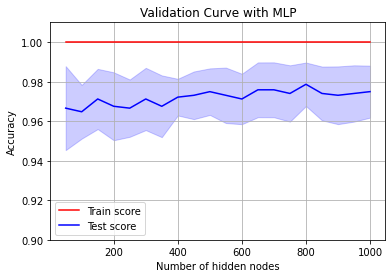


최적의 은닉층의 노드 개수는 800개 입니다.
[[63.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 66.  0.  0.  0.  0.  2.  0.  4.  0.]
 [ 0.  0. 78.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0. 63.  0.  0.  0.  0.  0.  2.]
 [ 0.  0.  0.  0. 61.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 77.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0. 74.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0. 75.  0.  0.]
 [ 0.  0.  0.  5.  0.  0.  0.  0. 69.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 76.]]
테스트 집합에 대한 정확률은 97.63560500695411입니다.


In [14]:
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, validation_curve
import numpy as np
import matplotlib.pyplot as plt
import time

digit = datasets.load_digits()
x_train, x_test, y_train, y_test = train_test_split(digit.data, digit.target, train_size=0.6)

start = time.time()
mlp = MLPClassifier(learning_rate_init=0.001, batch_size=32, max_iter=300, solver='sgd')
param_range = range(50, 1001, 50)
train_score, test_score = validation_curve(mlp, x_train, y_train, param_name='hidden_layer_sizes', param_range=param_range, cv=10, scoring='accuracy', n_jobs=4)
end = time.time()
print('하이퍼 파라미터 최적화에 걸린 시간은 {}초입니다.'.format(end-start))

# 교차 검증 결과의 평균과 분산 구하기
train_mean = np.mean(train_score, axis=1)
train_std = np.std(train_score, axis=1)
test_mean = np.mean(test_score, axis=1)
test_std = np.std(test_score, axis=1)

# 성능 그래프
plt.plot(param_range, train_mean, label='Train score', color='r')
plt.plot(param_range, test_mean, label='Test score', color='b')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color='r')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.2, color='b')
plt.legend(loc='best')
plt.title('Validation Curve with MLP')
plt.xlabel('Number of hidden nodes')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.01)
plt.grid(axis='both')
plt.show()

best_number_nodes = param_range[np.argmax(test_mean)]
print('\n최적의 은닉층의 노드 개수는 {}개 입니다.'.format(best_number_nodes))

mlp_test = MLPClassifier(hidden_layer_sizes=(best_number_nodes), learning_rate_init=0.001, batch_size=32, max_iter=300, solver='sgd')
mlp_test.fit(x_train, y_train)

result = mlp_test.predict(x_test)

conf_mat = np.zeros((10, 10))
for i in range(len(result)):
    conf_mat[result[i]][y_test[i]] += 1
print(conf_mat)

num_correct = 0
for i in range(10):
    num_correct += conf_mat[i][i]
accuracy = num_correct / len(result)
print('테스트 집합에 대한 정확률은 {}입니다.'.format(accuracy * 100))